# SMS SPAM COLLECTION: Exploratory Data Analysis

This Jupyter notebook serves as a quantitative analysis of the project's train set, complementing the paper titled [TITLE].
The associated paper can be found on GitHub at [GITHUB]. 

In [19]:
import sys
sys.path.append('\\Users\\usuario\\Desktop\\SMS_Project\\EDA\\utils.py')

In [20]:
import numpy as np
import regex as re
import nltk
from nltk.tokenize import word_tokenize
from utils import get_sentences, get_stats, tokenizer, get_stats_tokens, get_basics_tokens, get_advanced_tokens, extract_emojis, count_emojis, sentence_parser_emoji, plot_custom_boxplots
nltk.download('punkt')
import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
# Import trainset file
filepath = 'train-dev.arff'

In [22]:
# Extract ham and spam messages separately
ham, spam = get_sentences(filepath)

## Analysis on a character level

In [23]:
get_stats(ham)

Total sentences: 3861
Average sentence length: 72
Minimum sentence length: 2
Maximum sentence length: 909
Percentile 25, length: 34.0
Percentile 50, length: 93.0


In [24]:
get_stats(spam)

Total sentences: 597
Average sentence length: 139
Minimum sentence length: 18
Maximum sentence length: 223
Percentile 25, length: 132.0
Percentile 50, length: 157.0


## Analysis on a token level

In [25]:
tokens_spam, tokens_list_spam = get_stats_tokens(spam)
tokens_ham, tokens_list_ham = get_stats_tokens(ham)

In [26]:
get_basics_tokens(tokens_ham, tokens_list_ham, tokens_spam, tokens_list_spam)

Total tokens: 83325
Spam tokens: 16726
Ham tokens: 66599


In [27]:
print("Ham Statistics:")
get_advanced_tokens(tokens_ham, tokens_list_ham)

Ham Statistics:
Average sentence length (tokens): 17
Minimum sentence length (tokens): 1
Maximum sentence length (tokens): 185
Percentile 25, length: 8.0
Percentile 75, length: 22.0


In [28]:
print("Spam Statistics:")
get_advanced_tokens(tokens_spam, tokens_list_spam)

Spam Statistics:
Average sentence length (tokens): 28
Minimum sentence length (tokens): 2
Maximum sentence length (tokens): 46
Percentile 25, length: 25.0
Percentile 75, length: 32.0


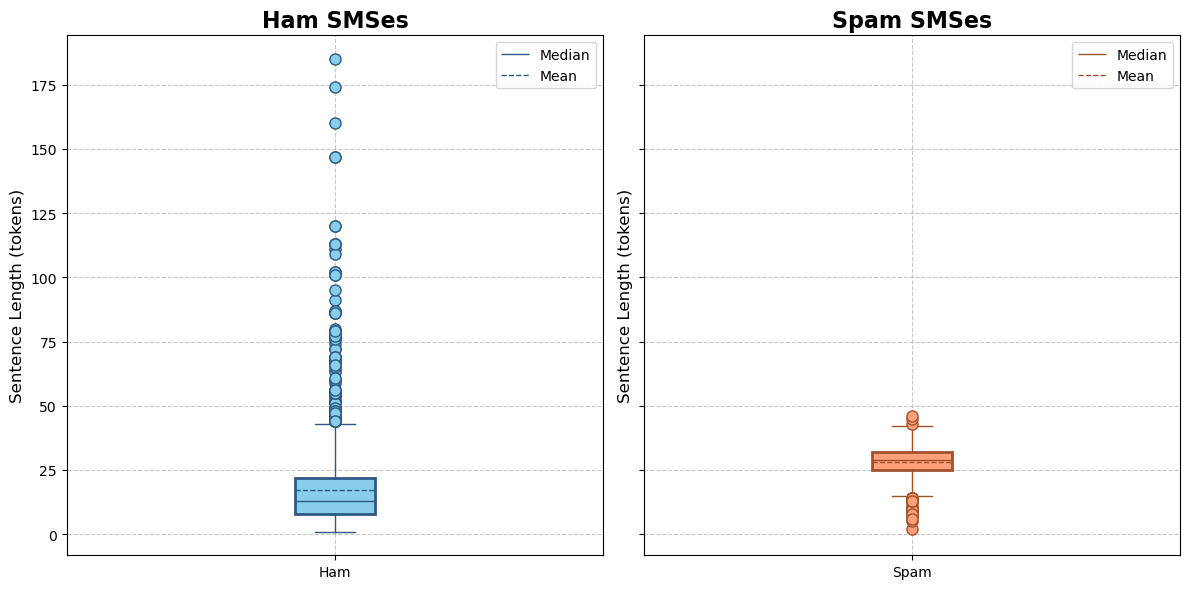

In [29]:
ham_data = [len(sentence) for sentence in tokens_list_ham]  
spam_data = [len(sentence) for sentence in tokens_list_spam]  


plot_custom_boxplots(ham_data, spam_data)

In the following lines we will examine selected cases from our data to better understand the outliers. First, we will look at the shortest and longest SMS in each category.

In [37]:
sentence_lengths = [len(sentence) for sentence in tokens_list_ham]
min_idx = np.argmin(sentence_lengths)
max_idx = np.argmax(sentence_lengths)
print(f"ham longest sentence index: {max_idx}\n{ham[2425]}")
print()
print(f"ham shortest sentence index: {min_idx}\n{ham[568]}")

ham longest sentence index: 2425
The last thing i ever wanted to do was hurt you. And i didnt think it would have. Youd laugh, be embarassed, delete the tag and keep going. But as far as i knew, it wasnt even up. The fact that you even felt like i would do it to hurt you shows you really dont know me at all. It was messy wednesday, but it wasnt bad. The problem i have with it is you HAVE the time to clean it, but you choose not to. You skype, you take pictures, you sleep, you want to go out. I dont mind a few things here and there, but when you dont make the bed, when you throw laundry on top of it, when i cant have a friend in the house because im embarassed that theres underwear and bras strewn on the bed, pillows on the floor, thats something else. You used to be good about at least making the bed.

ham shortest sentence index: 568
Okie


In [35]:
sentence_lengths = [len(sentence) for sentence in tokens_list_spam]
min_idx = np.argmin(sentence_lengths)
max_idx = np.argmax(sentence_lengths)
print(f"spam longest sentence index: {max_idx}\n{spam[542]}")
print()
print(f"spam shortest sentence index: {min_idx}\n{spam[135]}")

spam longest sentence index: 542
URGENT! Your mobile number *************** WON a £2000 Bonus Caller prize on 10/06/03! This is the 2nd attempt to reach you! Call 09066368753 ASAP! Box 97N7QP, 150ppm

spam shortest sentence index: 135
ringtoneking 84484


Finally, we assume that we will find several emoticons in our dataset. We will extract them using the following pattern:

``[:;][-]?[\']?[)(\*\$\|BDOSdPp/\\]+(?<![:/\\]``

In [32]:
extract_emojis("train_emojis.arff")

[':-)',
 ':-)',
 ':)',
 ':)',
 ':-)',
 ':-)',
 ':)',
 ':)',
 ';D',
 ':)',
 ':-D',
 ':-)',
 ':-)',
 ':)',
 ';D',
 ':)',
 ':)',
 ':)',
 ':-)',
 ':-)',
 ':)',
 ':)',
 ':)',
 ':-)',
 ':)',
 ':)',
 ':-)',
 ';-)',
 ':-)',
 ':-)',
 ':(',
 ':-(',
 ':)',
 ':)',
 ':)',
 ':)',
 ':)',
 ':)',
 ':)',
 ';D',
 ';D',
 ';D',
 ':-)',
 ':)',
 ':-)',
 ':-)',
 ':-)',
 ':)',
 ':-)',
 ':)',
 ':-)',
 ':-)',
 ':-)',
 ';D',
 ';D',
 ':)',
 ';-)',
 ':)',
 ';D',
 ':)',
 ':)',
 ':)',
 ':)',
 ':)',
 ':)',
 ';-)',
 ':-)',
 ':)',
 ':)',
 ':)',
 ':)',
 ':)',
 ':-)',
 ':)',
 ':)',
 ':-)',
 ':)',
 ';D',
 ':)',
 ':)',
 ':-)',
 ':(',
 ':)',
 ':)',
 ';D',
 ':)',
 ':)',
 ':*',
 ';)',
 ':)',
 ':)',
 ':)',
 ':)',
 ':)',
 ':)',
 ':)',
 ':)',
 ':)',
 ':-)',
 ':-(',
 ':)',
 ':-)',
 ':-)',
 ':-)',
 ':(',
 ':)',
 ';D',
 ':-(',
 ':-)',
 ':)',
 ':)',
 ':-P',
 ':)',
 ':)',
 ':)',
 ':)',
 ':(',
 ':-)',
 ':)',
 ':)',
 ':)',
 ':-(',
 ';-(',
 ':-)',
 ':-)',
 ':)',
 ':-)',
 ':)',
 ':-)',
 ':-)',
 ':-)',
 ':)',
 ':)',
 ':)',
 ':)',
 ':O',
 '

In [33]:
ham_messages, spam_messages = sentence_parser_emoji("train_emojis.arff")

In [34]:
print("Total number of emojis in ham: ", count_emojis(ham_messages))
print("Total number of emojis in spam: ",count_emojis(spam_messages))

Total number of emojis in ham:  366
Total number of emojis in spam:  1
